In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

C:\Users\aryan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


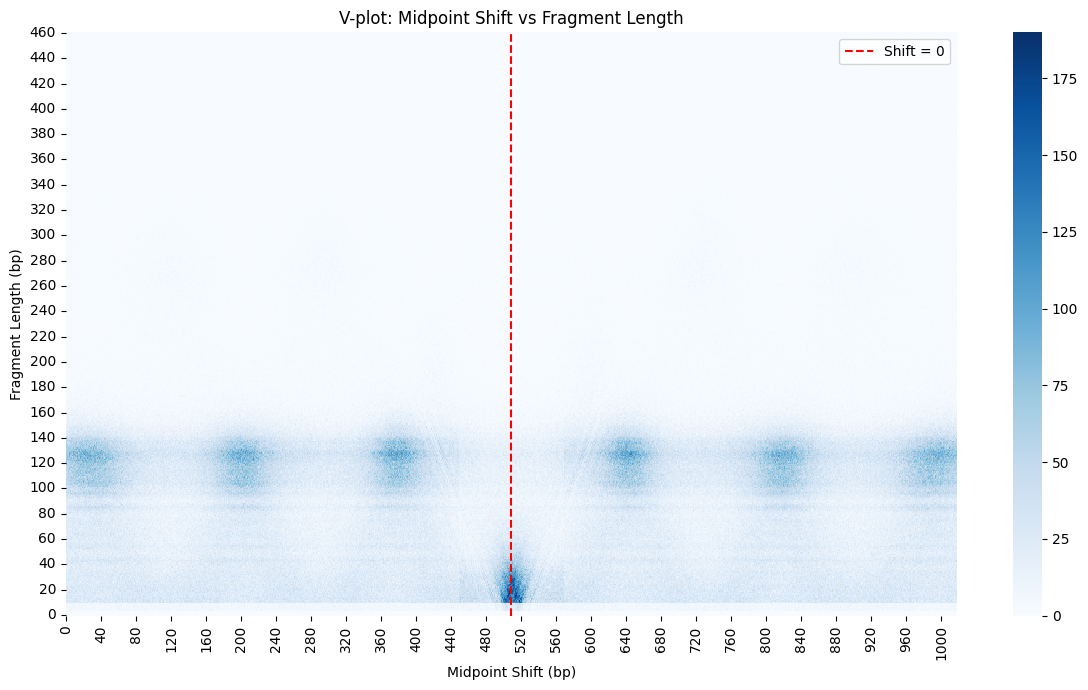

In [14]:
# loc of my data
input_file = "./data/mapped.bed"

# to store count of (X,Y) pairs
count = Counter()

with open(input_file, 'r') as file:
    for line in file:
        fields = line.strip().split('\t')

        # Calculating midpiont 
        midpoint_1 = (int(fields[2]) + int(fields[3])) // 2
        midpoint_2 = (int(fields[8]) + int(fields[9])) // 2

        delta_x = midpoint_2 - midpoint_1
        frag_len = int(fields[9]) - int(fields[8])

        count[(delta_x, frag_len)] += 1

all_x = sorted(set(x for x, y in count))
all_y = sorted(set(y for x, y in count))

x_to_idx = {val: i for i, val in enumerate(all_x)}
y_to_idx = {val: i for i, val in enumerate(all_y)}

heatmap_data = np.zeros((len(all_y), len(all_x)))
for (dx, fl), freq in count.items():
    heatmap_data[y_to_idx[fl], x_to_idx[dx]] = freq

plt.figure(figsize=(12, 7))
sns.heatmap(
    heatmap_data,
    cmap="Blues",
    cbar=True,
    xticklabels=40,
    yticklabels=20
)

plt.gca().invert_yaxis()
plt.title("V-plot: Midpoint Shift vs Fragment Length")
plt.xlabel("Midpoint Shift (bp)")
plt.ylabel("Fragment Length (bp)")
plt.tight_layout()

# a line to show the shifted X=0
if 0 in x_to_idx:
    plt.axvline(x=x_to_idx[0], color='red', linestyle='--', label='Shift = 0')
    plt.legend()

plt.show()


my observations:

- V-Shape Centered at X = 0 i.e. many fragments center around a common genomic feature 
- Horizontal wave like pattern depicting recurring fragment sizes.
- Dense spots around lengths ~100–140 bp (frag length). Fainter layers above imply di- or tri-nucleosomes.